In [11]:
import pandas as pd
import numpy as np

dflocal = pd.read_csv("exps/experimentslocal.csv",header=None,index_col=False,names=["file","wordcount","sort","total"])
df = pd.read_csv("exps/experiments.csv",header=None,index_col=False,names=["file","nmachines","nsplits","clean","split","send","map","shuffle","reduce","getreduces","reducelocal","sort","final"])
df = df.drop(2761,axis=0).reset_index(drop=True)
dfbig = pd.read_csv("exps/experimentsBIG.csv",header=None,index_col=False,names=["file","nmachines","nsplits","clean","split","send","map","shuffle","reduce","getreduces","reducelocal","sort","final"])
df.head()

,file,nmachines,nsplits,clean,split,send,map,shuffle,reduce,getreduces,reducelocal,sort,final
0,warc,1,1,6.741546,8.016060,19.187769,12.396974,53.137408,7.977668,27.110735,11.703891,0.550527,144.095715
1,warc,2,1,5.975019,7.802191,17.265513,7.400996,31.966310,7.486825,14.472234,8.446807,0.564492,99.087905
2,warc,3,1,6.409820,7.720265,18.077066,5.189983,22.213989,8.036040,12.025697,7.505232,0.583477,84.890204
3,warc,4,1,6.517570,7.718959,18.120849,3.937131,17.122087,6.953547,9.747473,7.026019,0.578453,75.851311
4,warc,5,1,6.551472,7.700427,17.825401,3.374487,13.971496,6.757741,8.984810,6.803088,0.578453,70.953862


In [12]:
df["final_nonetwork"] = df["final"]-df["send"]-df["getreduces"]-df["clean"]

In [13]:
dfg = df.groupby(["file","nmachines","nsplits"]).mean()
dfg.head()

clean     split      send  \
file                         nmachines nsplits                                 
deontologie_police_nationale 1         1        8.118773  0.008526  0.471256   
                                       2        7.195559  0.000665  0.500690   
                                       3        7.109197  0.001652  0.473180   
                                       4        7.237942  0.000997  0.574204   
                                       5        7.348577  0.001330  0.547142   

                                                     map   shuffle    reduce  \
file                         nmachines nsplits                                 
deontologie_police_nationale 1         1        0.558564  0.818939  0.401813   
                                       2        0.577669  0.846471  0.414001   
                                       3        0.591211  0.837602  0.392460   
                                       4        0.870495  0.953186  0.665074   
                                       5        0.514042  0.845551  0.396767   

                                                getreduces  reducelocal  \
file                         nmachines nsplits                            
deontologie_police_nationale 1         1          0.970936     0.301823   
                                       2          0.934932     0.290454   
                                       3          0.920897     0.275522   
                                       4          1.270988     0.275973   
                                       5          0.929751     0.269568   

                                                    sort      final  \
file                         nmachines nsplits                        
deontologie_police_nationale 1         1        0.000000  12.901326   
                                       2        0.000666  11.787177   
                                       3        0.000332  11.600099   
                                       4        0.000000  12.514569   
                                       5        0.000333  11.785901   

                                                final_nonetwork  
file                         nmachines nsplits                   
deontologie_police_nationale 1         1               3.340362  
                                       2               3.155996  
                                       3               3.096825  
                                       4               3.431434  
                                       5               2.960430

In [14]:
df.loc[df.groupby("file")["final_nonetwork"].idxmin()]

,file,nmachines,nsplits,clean,split,send,map,shuffle,reduce,getreduces,reducelocal,sort,final,final_nonetwork
640,deontologie_police_nationale,1,13,7.230663,0.006982,0.660234,0.537432,0.811100,0.406983,1.313398,0.235891,0.000000,11.751114,2.546820
1755,domaine_public_fluvial,1,16,7.075440,0.000000,0.929821,0.500767,0.867052,0.433149,0.981082,0.287265,0.000000,11.624260,2.637917
1895,forestier_mayotte,1,3,7.075758,0.000000,0.479806,0.502712,0.804500,0.430060,0.977185,0.266352,0.000000,11.025032,2.492282
2335,input,1,5,7.383503,0.002959,0.455868,0.547501,0.865412,0.401596,0.952416,0.263606,0.000000,11.406382,2.614595
4542,sante_publique,4,7,7.183113,0.232127,1.369637,0.548219,0.998313,0.490013,1.096613,0.349700,0.006981,13.903576,4.254213
234,warc,15,12,6.360987,6.698822,18.707798,0.758331,2.347428,6.832798,7.908566,5.741675,0.617387,54.805151,21.827800


In [72]:
dfmin = dfg.reset_index().loc[dfg.reset_index().groupby("file")["final_nonetwork"].idxmin()]
dfmin.set_index(["file","nmachines","nsplits"])[["final","final_nonetwork"]].apply(lambda x: round(x,2)).to_latex("tex/minbyfile.tex")

In [16]:
dflocal = dflocal.groupby("file").mean().reset_index()
dflocal["file"] = dflocal["file"].apply(lambda x: x.split("\\")[-1].split(".")[-2])
for col in dflocal.columns[1:]:
    dflocal[col] = dflocal[col].apply(lambda x: round(x,2))
#dflocal = dflocal.set_index("file")
dflocal

,file,wordcount,sort,total
0,warc,32.33,15.29,53.24
1,deontologie_police_nationale,0.00,0.00,0.02
2,domaine_public_fluvial,0.01,0.00,0.01
3,forestier_mayotte,0.00,0.00,0.00
4,input,0.00,0.00,0.00
5,sante_publique,1.16,0.07,1.28
6,12BIG,465.88,101.20,600.89


In [17]:
dflocal.to_latex("tex/local.tex")

In [18]:
compare = dflocal[["file","total"]].merge(dfmin[["file","final_nonetwork"]], on="file").sort_values("total")
compare["file"] = compare["file"].apply(lambda x: x.split("_")[-1] if "_" in x else x)
compare

,file,total,final_nonetwork
3,mayotte,0.00,3.054172
4,input,0.00,3.148376
2,fluvial,0.01,3.177233
1,nationale,0.02,2.960430
5,publique,1.28,4.254213
0,warc,53.24,22.419732


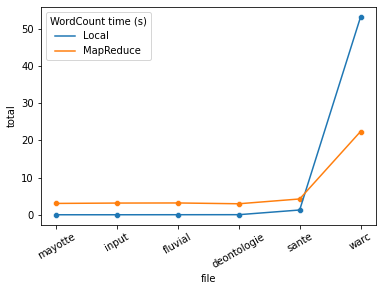

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.lineplot(x=compare["file"],y=compare["total"],legend=False)
sns.lineplot(x=compare["file"],y=compare["final_nonetwork"],legend=False)
sns.scatterplot(x=compare["file"],y=compare["total"],legend=False)
sns.scatterplot(x=compare["file"],y=compare["final_nonetwork"],legend=False)
plt.xticks(compare["file"], ["mayotte","input","fluvial","deontologie","sante","warc"],rotation=30)
plt.legend(title="WordCount time (s)",loc="upper left",labels=["Local","MapReduce"])
plt.savefig("figs/localvsmapreduce.png",bbox_inches = 'tight')
plt.show()

In [20]:
dfbig = dfbig.groupby(["file","nmachines","nsplits"]).mean().reset_index()
for col in dfbig.columns[1:]:
    dfbig[col] = dfbig[col].apply(lambda x: round(x,2))
dfbig["file"] = dfbig["nmachines"] * dfbig["nsplits"]
dfbig = dfbig.rename({"file":"total files"},axis=1)
dfbig = dfbig.set_index("total files").sort_index()
dfbig["final_nonetwork"] = dfbig["final"]-dfbig["getreduces"]-dfbig["clean"]
dfbig

,nmachines,nsplits,clean,split,send,map,shuffle,reduce,getreduces,reducelocal,sort,final,final_nonetwork
total files,,,,,,,,,,,,,
12,3,4,10.16,0.07,0.57,80.80,234.35,50.25,118.08,50.72,3.67,525.11,396.87
12,4,3,7.84,0.06,0.51,62.60,173.64,52.36,77.15,47.61,3.53,400.94,315.95
12,6,2,7.68,0.06,0.52,46.25,118.99,49.18,63.13,44.11,3.63,309.47,238.66
12,12,1,8.04,0.07,0.72,34.23,62.17,49.31,56.19,40.75,3.67,231.66,167.43
24,6,4,8.07,0.05,0.57,79.98,235.23,86.49,232.54,75.90,18.37,719.62,479.01
24,8,3,8.65,0.06,0.63,62.66,176.58,80.79,101.90,76.19,12.13,492.57,382.02
24,12,2,8.40,0.06,0.63,48.94,124.01,78.55,90.37,61.88,6.37,396.81,298.04
24,24,1,19.40,0.07,0.76,38.75,65.54,78.08,84.76,58.50,7.07,331.93,227.77


In [22]:
dfbig[["nmachines","nsplits","final","final_nonetwork"]].to_latex("tex/big.tex")

In [133]:
lol = pd.read_csv("tables\CC-MAIN-20170322212949-00140-ip-10-233-31-227.ec2.internal.warc.wet-table.csv",index_col=0)
lol[["machines","splits"]] = lol[["machines","splits"]].astype(int)
lol["avgtime"] = lol["avgtime"].astype(float)
lol = pd.pivot_table(lol,"avgtime","machines","splits",aggfunc="last")

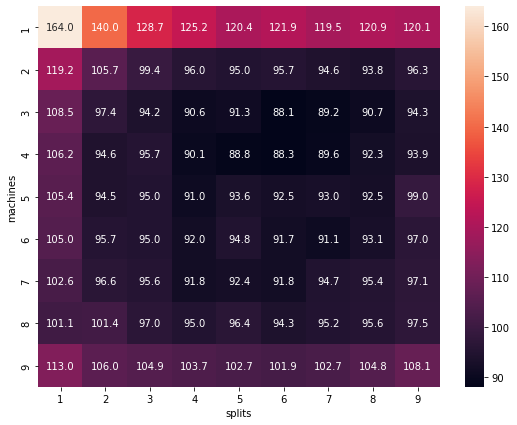

In [136]:
plt.figure(figsize=(9,7))
sns.heatmap(lol,annot=True,fmt=".1f")
plt.savefig("figs\CC-MAIN-20170322212949-00140-ip-10-233-31-227.ec2.internal.warc.wet-heatmap.png")
plt.show()

In [124]:
lol2 = pd.pivot_table(dfg.loc[["warc"]],"final","nmachines","nsplits",aggfunc="last").iloc[:9,:9]
lol2

nsplits,1,2,3,4,5,6,7,8,9
nmachines,,,,,,,,,
1,145.526694,125.379527,110.776985,100.435260,97.958333,95.361298,95.384202,98.149366,95.725744
2,102.195497,84.447664,79.619534,78.229662,72.222223,73.261931,71.848160,73.443606,72.991289
3,91.965677,74.965875,69.698224,67.446686,67.690124,66.932444,65.525210,65.426922,69.076280
4,84.164805,69.007787,66.403661,65.173762,63.251001,61.918234,63.761405,64.701024,67.185263
5,74.739766,66.698922,64.562796,61.965176,60.879296,62.198644,62.440529,62.906073,62.128159
6,71.884433,69.338054,63.571672,61.178074,60.375948,61.144800,61.633664,62.813810,61.886968
7,70.505238,70.096010,61.755951,60.086199,60.321181,62.093473,60.268708,60.863198,62.480953
8,131.469766,62.700013,61.161147,60.807642,59.372295,60.019831,59.882479,59.356353,62.920642
9,77.168374,61.743869,59.869479,59.881255,59.432231,59.157466,58.804713,60.913488,60.777850


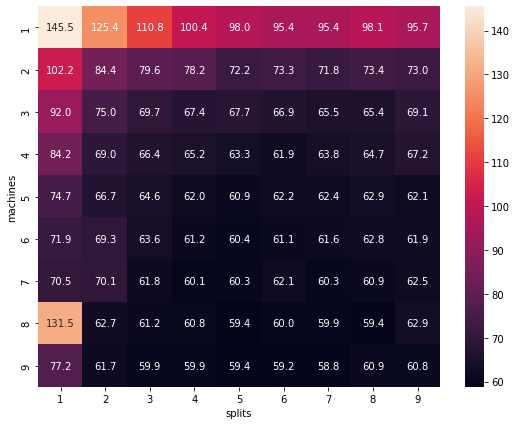

In [125]:
plt.figure(figsize=(9,7))
sns.heatmap(lol2,annot=True,fmt=".1f",)
plt.xlabel("splits")
plt.ylabel("machines")
plt.savefig("figs/betterwarc.png")
plt.show()

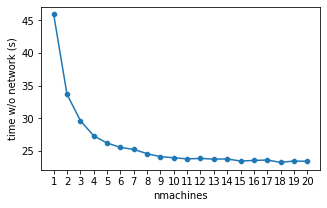

In [98]:
plt.figure(figsize=(5,3))
dftemp = df.groupby(["file","nmachines"]).mean().loc[["warc"]].reset_index().drop(["nsplits","file"],axis=1)
dftemp["nmachines"] = dftemp["nmachines"].astype(str)
sns.lineplot(data=dftemp,x="nmachines",y="final_nonetwork")
sns.scatterplot(data=dftemp,x="nmachines",y="final_nonetwork")
plt.ylabel("time w/o network (s)")
plt.savefig("figs/cctimevsnmachines.png",bbox_inches = 'tight')
plt.show()

In [171]:
df[df["nsplits"]==1].groupby(["file","nmachines"]).mean().loc[["warc"]].reset_index().drop(["nsplits","file"],axis=1)[["nmachines","final","final_nonetwork"]]#.set_index("nmachines").to_latex("amdahl.tex")

,nmachines,final,final_nonetwork
0,1,145.526694,91.327428
1,2,102.195497,61.066815
2,3,91.965677,48.353402
3,4,84.164805,41.527792
4,5,74.739766,37.621356
5,6,71.884433,35.117206
6,7,70.505238,33.488161
7,8,131.469766,31.551703
8,9,77.168374,30.373991
9,10,69.855181,29.628337


In [250]:
mask = df["nsplits"]==1
mask = [True for _ in range(len(df))]
dfamdahl = df[mask].groupby(["file","nmachines"]).mean().loc[["warc"]].reset_index().drop("file",axis=1)#[["nmachines","final_nonetwork"]]

In [251]:
dfamdahl["speedup"] = dfamdahl["final_nonetwork"][0]/dfamdahl["final_nonetwork"]

In [252]:
dfamdahl["P"]=(dfamdahl["map"][0]+dfamdahl["shuffle"][0]+dfamdahl["reduce"][0])/dfamdahl["final_nonetwork"][0]

In [253]:
dfamdahl[["nmachines","final","final_nonetwork","speedup"]].set_index("nmachines").apply(lambda x: round(x,2)).to_latex("tex/amdahl2.tex")

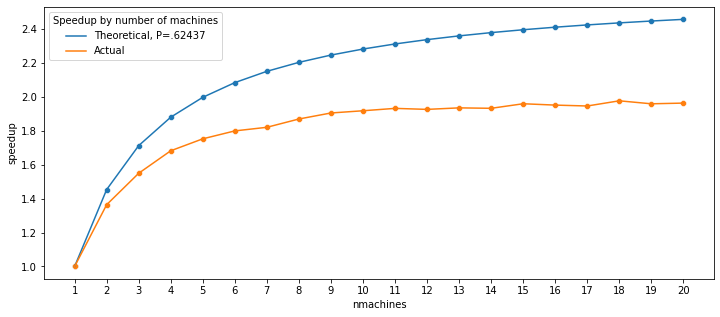

In [254]:
import numpy as np

P = .62437
marange = np.linspace(1,20,20)
theoretical = list(map(lambda x: 1/(1-P+(P/x)), marange))
marange = marange.astype(int).astype(str)

P = .75
marange2 = np.linspace(1,20,20)
theoretical2 = list(map(lambda x: 1/(1-P+(P/x)), marange2))
marange2 = marange2.astype(int).astype(str)

P = .8
marange3 = np.linspace(1,20,20)
theoretical3 = list(map(lambda x: 1/(1-P+(P/x)), marange3))
marange3 = marange3.astype(int).astype(str)

dfamdahl["nmachines"] = dfamdahl["nmachines"].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(x=marange,y=theoretical,legend=False)
#sns.lineplot(x=marange2,y=theoretical2,legend=False)
#sns.lineplot(x=marange3,y=theoretical3,legend=False)
sns.lineplot(data=dfamdahl,x="nmachines",y="speedup",legend=False)
sns.scatterplot(x=marange,y=theoretical,legend=False)
#sns.scatterplot(x=marange2,y=theoretical2,legend=False)
#sns.scatterplot(x=marange3,y=theoretical3,legend=False)
sns.scatterplot(data=dfamdahl,x="nmachines",y="speedup",legend=False)
plt.legend(title="Speedup by number of machines",loc="upper left",labels=["Theoretical, P=.62437","Actual"])##["Theoretical, P=.75","Theoretical, P=.8","Actual"])#
plt.savefig("figs/Amdahl.png")
plt.show()

In [226]:
from sklearn.linear_model import LinearRegression

R2 = LinearRegression().fit(np.array(theoretical2).reshape(-1,1),dfamdahl["speedup"]).score(np.array(theoretical2).reshape(-1,1),dfamdahl["speedup"])

In [227]:
R2

0.9959298632519344

In [228]:
R2 = LinearRegression().fit(np.array(theoretical3).reshape(-1,1),dfamdahl["speedup"]).score(np.array(theoretical3).reshape(-1,1),dfamdahl["speedup"])
R2

0.9994530220937259